In [17]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from app.utils import DB

In [18]:
db = DB()

In [23]:
plt.style.use("dark_background")

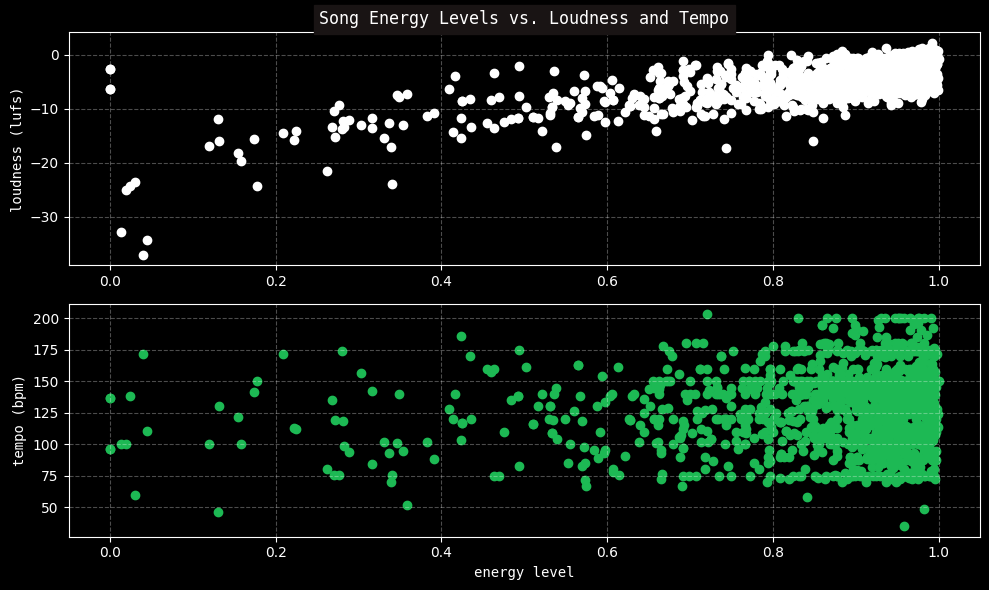

In [38]:
db.execute("SELECT * FROM track_features")
df = pd.DataFrame(db.result())
df.columns = ["track_id", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "type", "valence", "song_uri"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.scatter(df["energy"], df["loudness"], c="#FFFFFF")
ax1.set_title("Song Energy Levels vs. Loudness and Tempo", fontname="monospace", backgroundcolor="#191414")
ax1.set_ylabel("loudness (lufs)", fontname="monospace")

ax2.scatter(df["energy"], df["tempo"], c="#1DB954")
ax2.set_xlabel("energy level", fontname="monospace")
ax2.set_ylabel("tempo (bpm)", fontname="monospace")

ax1.grid(color="#FFFFFF", linestyle='--', alpha=.3)
ax2.grid(color="#FFFFFF", linestyle='--', alpha=.3)
fig.tight_layout()

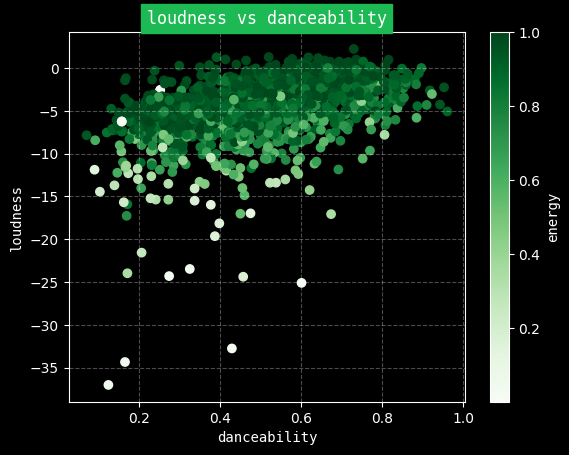

In [41]:
db.execute("SELECT * FROM track_features")
df = pd.DataFrame(db.result())
df.columns = ["track_id", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "type", "valence", "song_uri"]

plt.scatter(df["danceability"], df["loudness"], c=df["energy"], cmap="Greens")
cbar = plt.colorbar()
cbar.set_label("energy", fontname="monospace",)
plt.title("loudness vs danceability", fontname="monospace", backgroundcolor="#1DB954")
plt.xlabel("danceability", fontname="monospace")
plt.ylabel("loudness", fontname="monospace")

plt.grid(color="#FFFFFF", linestyle="--", alpha=.3)
fig.tight_layout()

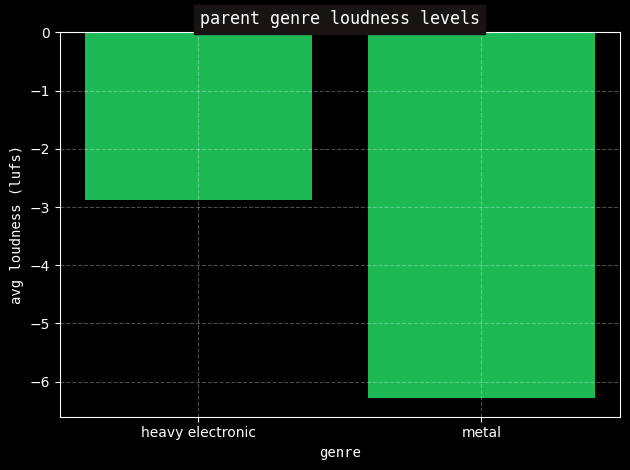

In [144]:
# parent genre loudness
db.execute("SELECT * FROM V_genre_features")
df = pd.DataFrame(db.result())
df.columns = ["genre", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
df.sort_values("loudness", ascending=True, inplace=True)

metal_filter = df["genre"].isin(["djent", "alternative metal", "deathcore"])
elec_filter = ~metal_filter

avg_loudness_metal = df[metal_filter]["loudness"].mean()
avg_loudness_elec = df[elec_filter]["loudness"].mean()

plt.bar(["heavy electronic", "metal"], [avg_loudness_elec, avg_loudness_metal], color="#1DB954")
plt.title("parent genre loudness levels", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
plt.xlabel("genre", fontname="monospace")
plt.ylabel("avg loudness (lufs)", fontname="monospace")

plt.grid(color="#FFFFFF", linestyle="--", alpha=.3)
plt.tight_layout()

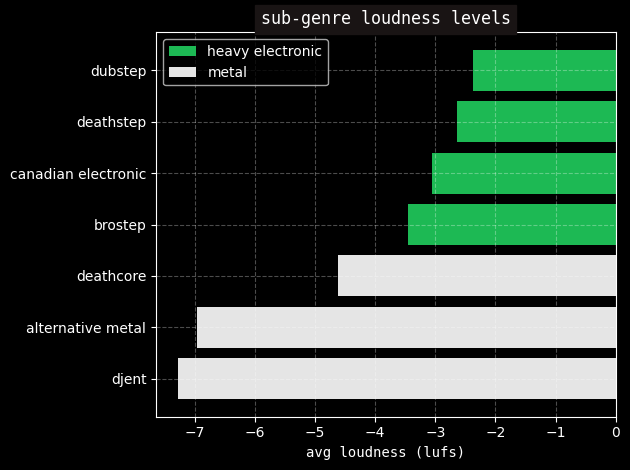

In [143]:
db.execute("SELECT * FROM V_genre_features")
df = pd.DataFrame(db.result())
df.columns = ["genre", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
df.sort_values("loudness", ascending=True, inplace=True)

metal_filter = df["genre"].isin(["djent", "alternative metal", "deathcore"])
elec_filter = df["genre"].isin(["dubstep", "brostep", "canadian electronic", "deathstep"])

plt.barh(df["genre"][metal_filter], df["loudness"][metal_filter], color="#FFFFFF", label="metal", alpha=.9)
plt.barh(df["genre"][elec_filter], df["loudness"][elec_filter], color="#1DB954", label="heavy electronic")
plt.title("sub-genre loudness levels", fontname="monospace", backgroundcolor="#191414", color="#FFFFFF")
plt.xlabel("avg loudness (lufs)", fontname="monospace")

plt.grid(color="#FFFFFF", linestyle="--", alpha=.3)
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[idx] for idx in (1, 0)],[labels[idx] for idx in (1, 0)])
plt.tight_layout()